# Breast Cancer Prediction

In this project, I am predicting if a person has breast cancer or not using machine learning. I got the data set from kaggle.

## Import Libraries for the project
Here, I am importing numpy and pandas.For visualization, I will use pyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors. Moreover, I will be using sklearn library for processing data.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import os
%matplotlib inline

For splitting the available dataset for testing and training, I'll be using the train_test_split method and for scaling the features, I'll be using StandardScaler. 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing dataset

In [4]:
dataset = pd.read_csv('Breast_cancer_data.csv')


## Visualizing the Data

In [6]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


Now let us see various visual representations of the data to understand more about relationship between various features.

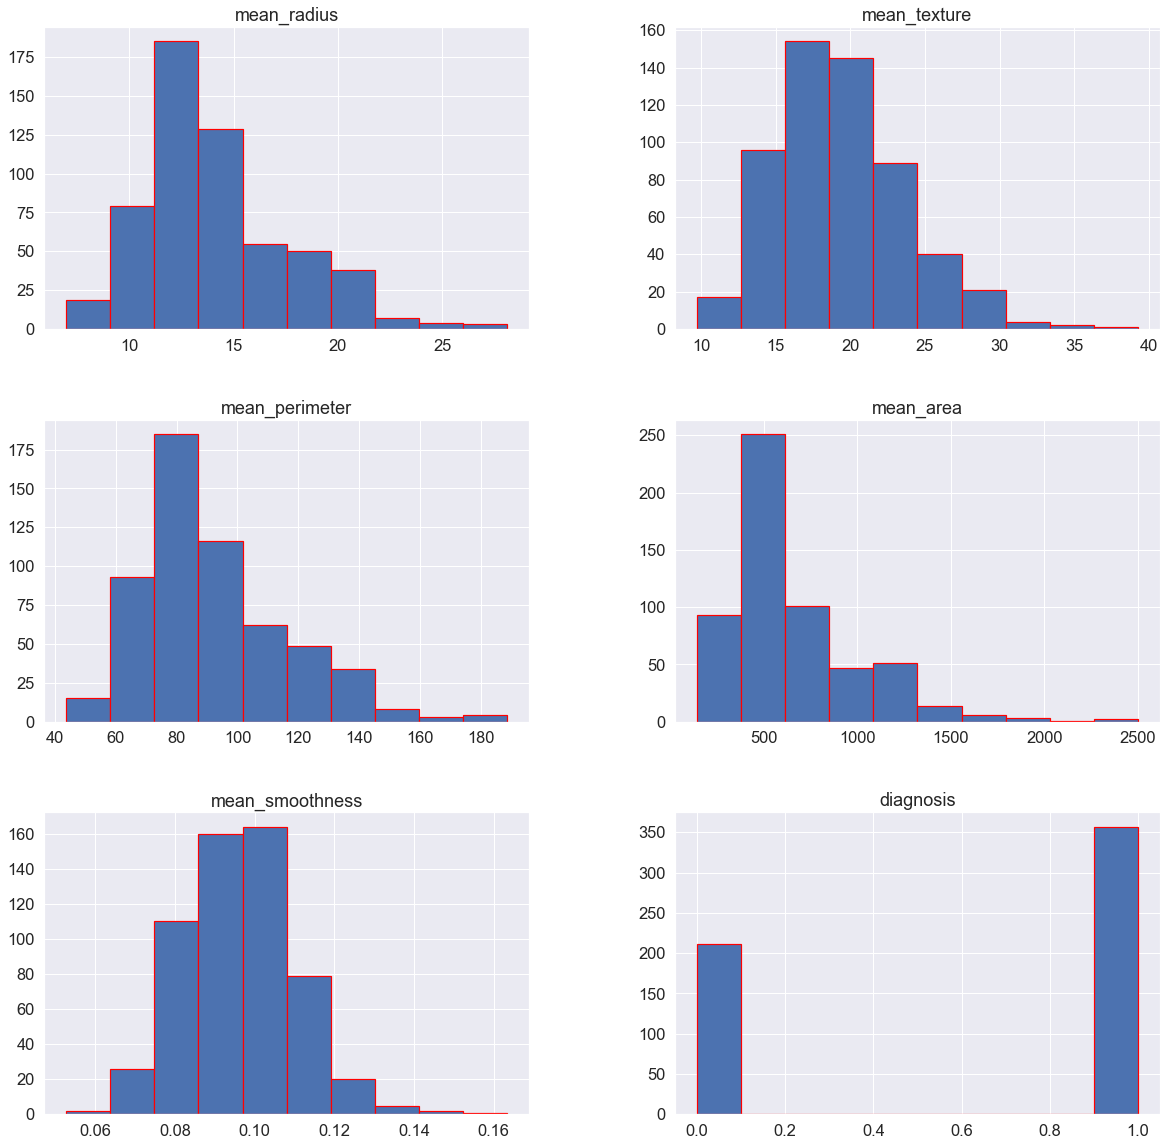

In [39]:
import seaborn as sns
sns.set(font_scale=1.5)
dataset.hist(edgecolor='red', linewidth=1.2, figsize=(20, 20));

## Corrrelation Matrix

One of the best way to compare relationship between various features is to look at the correlation matrix between those features.


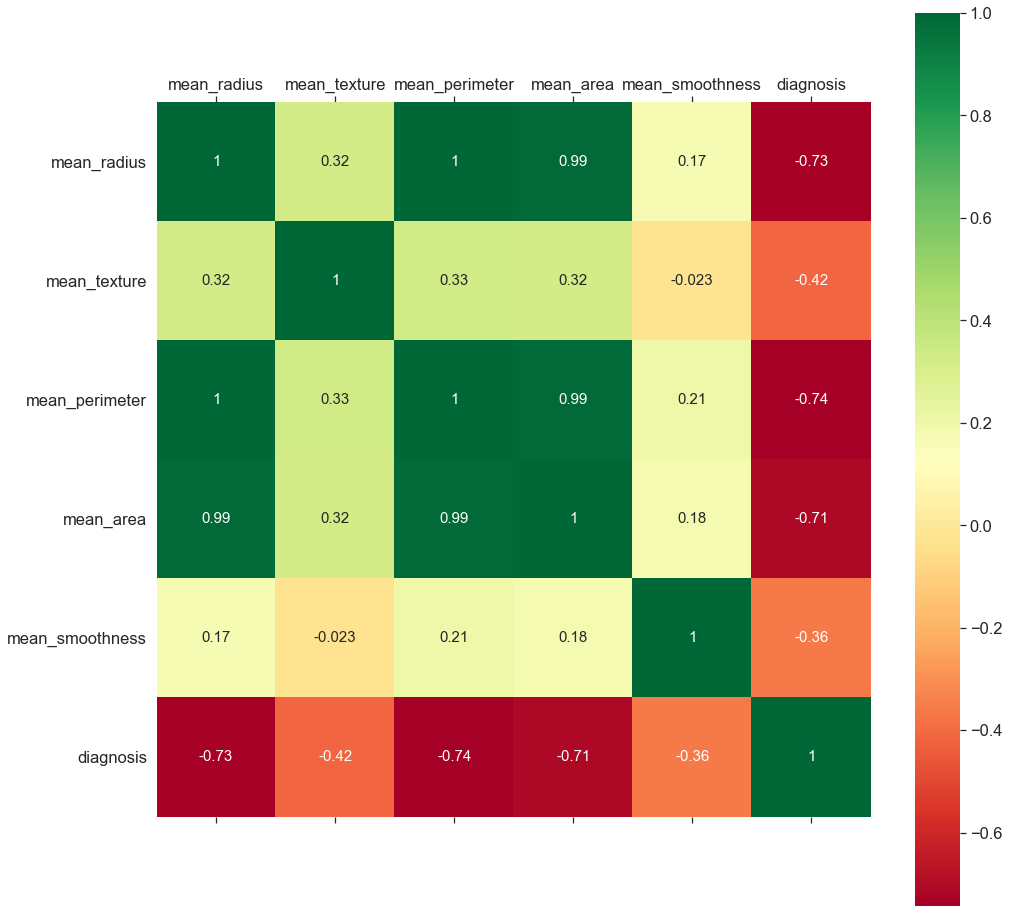

In [72]:
rcParams['figure.figsize'] = 24, 20
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
sns.heatmap(dataset[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

## Processing the data

I will be changing the names of my columns in more simpler forms and split the data in testing and training sets.

In [77]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = dataset.dropna()
df = df.rename(columns = {'mean_radius': 'radius', 'mean_texture': 'texture', 'mean_perimeter': 'perimeter', 'mean_area': 'area', 'mean_smoothness': 'smoothness', 'diagnosis': 'diagnosis', })
df.head()


,radius,texture,perimeter,area,smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [78]:
df = shuffle(df)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)

## Model Training 
I will be training a Logistic Regression Model to predict whether a person has breast cancer or not based on the following features:

radius, texture, perimeter, area, smoothness, diagnosis

In [140]:
from sklearn.linear_model import LogisticRegression

In [97]:
model = LogisticRegression()

In [98]:
model.fit(x_train, y_train)

LogisticRegression()

In [99]:
y_pred = model.predict(x_test)

## Creating a Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[54 12]
 [ 8 97]]


## Creating HeatMaps

<AxesSubplot:>

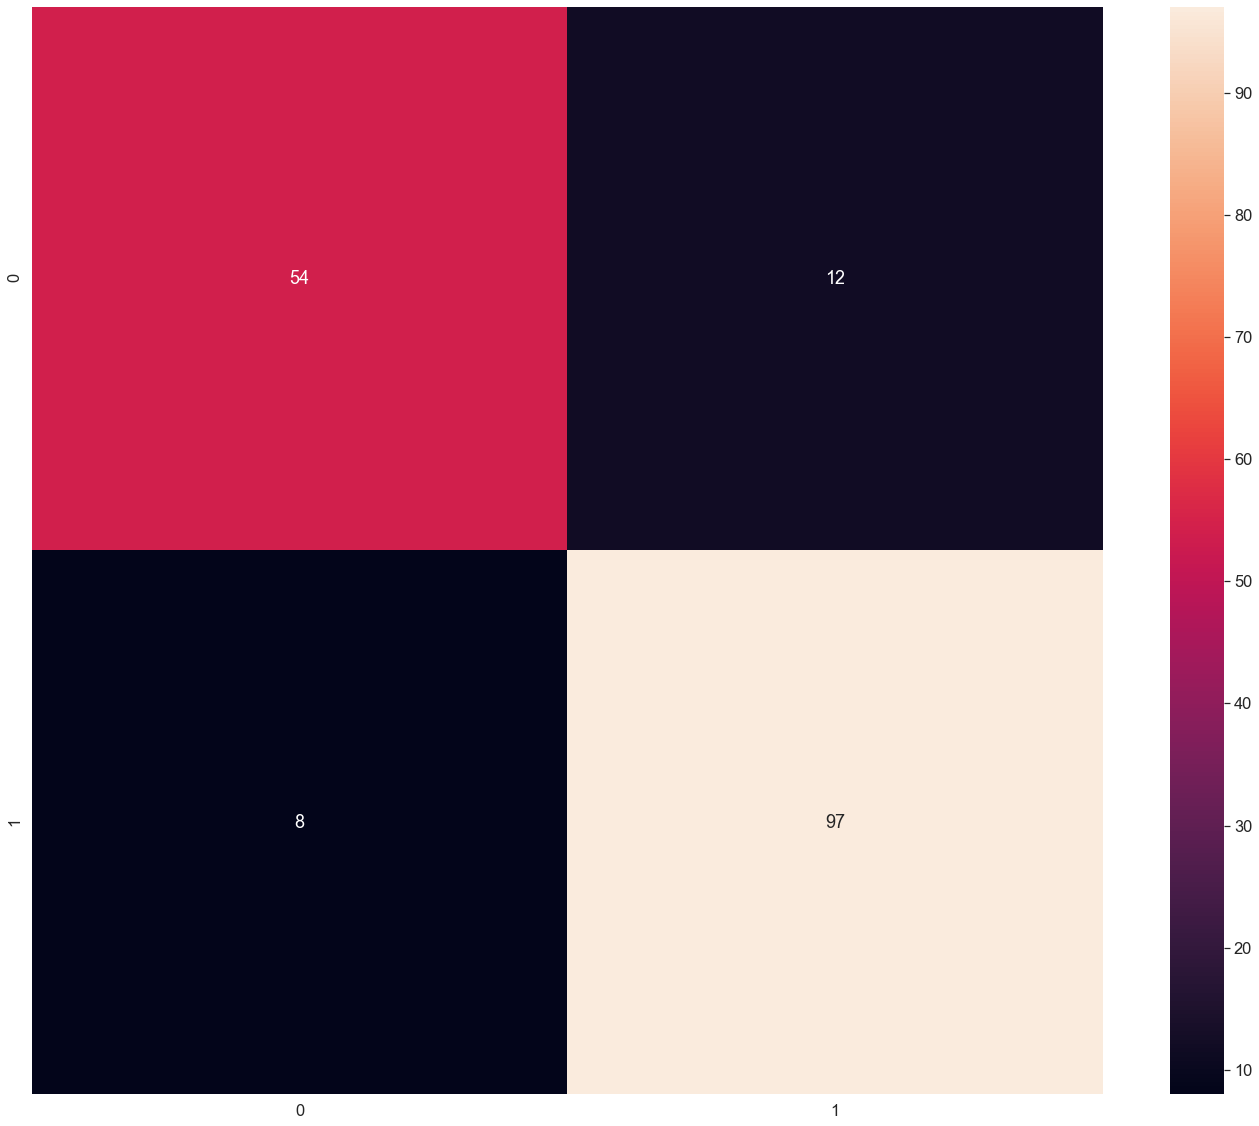

In [101]:
sns.heatmap(confusion_matrix, annot=True)

<AxesSubplot:>

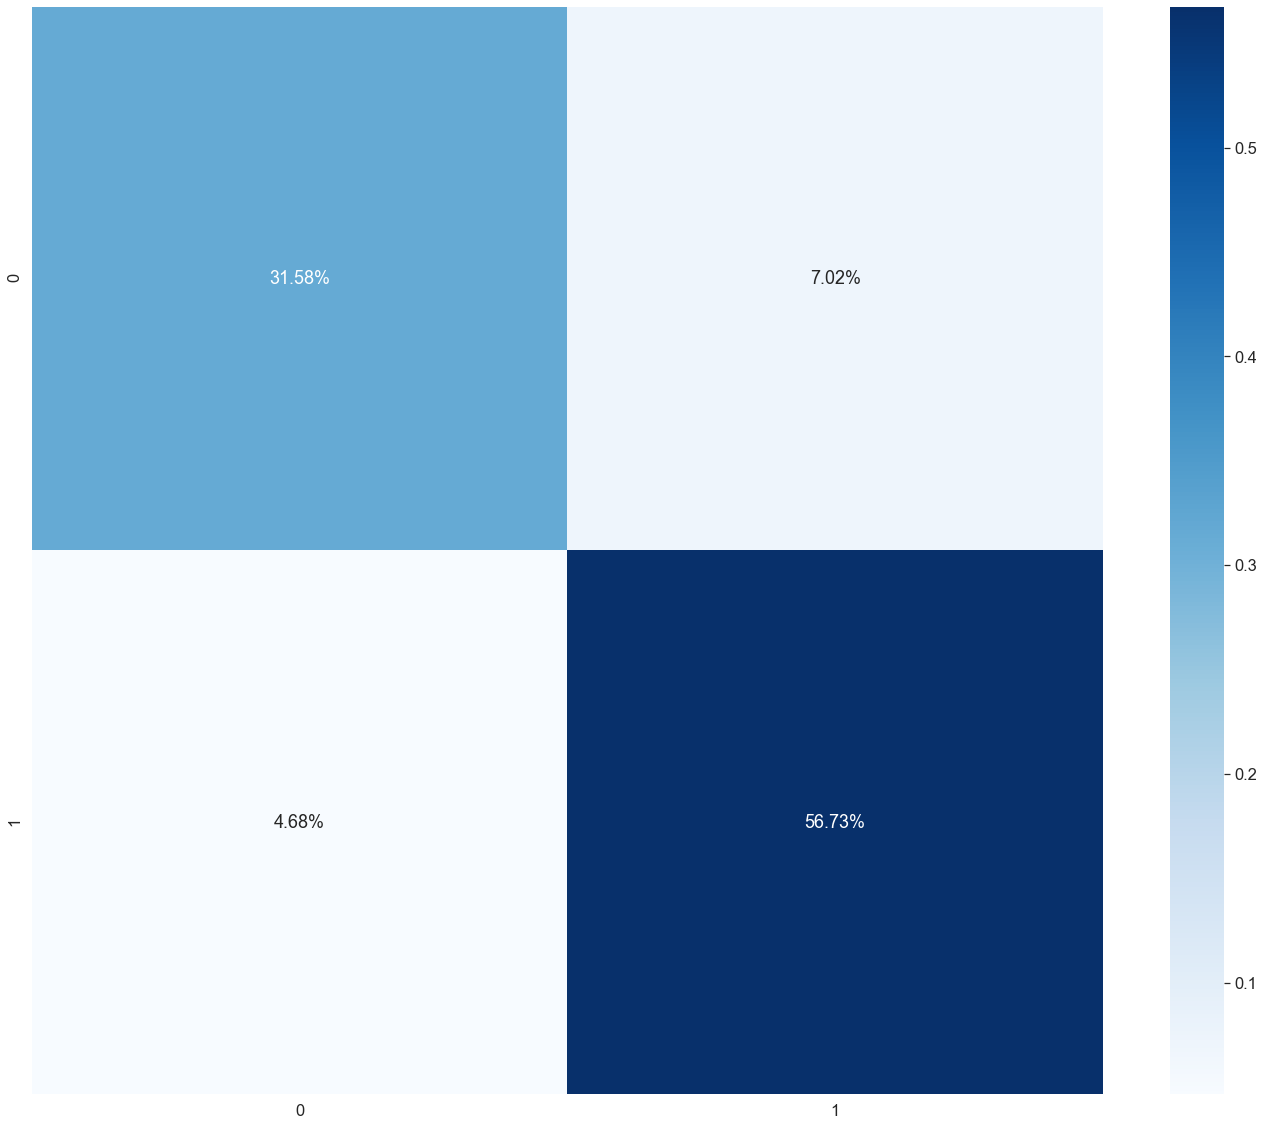

In [102]:
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<AxesSubplot:>

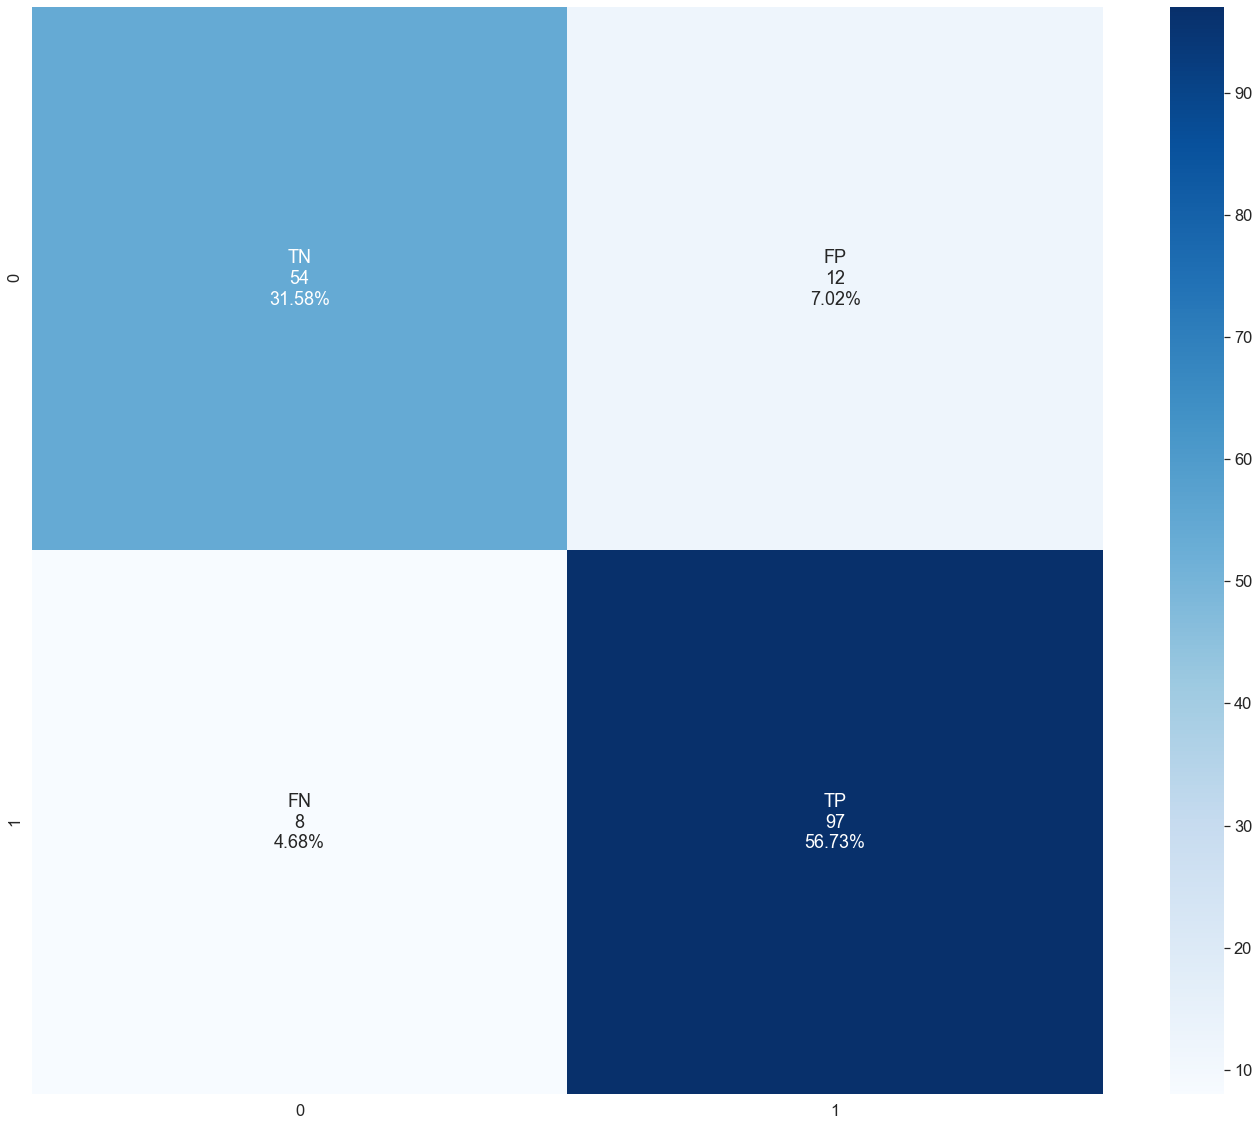

In [103]:
group_names = ['TN','FP','FN','TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

## Sensitivity, Specificity, and Precision

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

print("Accuracy")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print("Precision")
precision = precision_score(y_test, y_pred)
print(precision)
print("Recall/Sensitivity")
recall = recall_score(y_test, y_pred)
print(recall)
print("F1-Score")
f1 = f1_score(y_test, y_pred)
print(f1)

Accuracy
0.8830409356725146
Precision
0.8899082568807339
Recall/Sensitivity
0.9238095238095239
F1-Score
0.9065420560747663


## ROC Curve (TPR vs FPR)

In [106]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.950


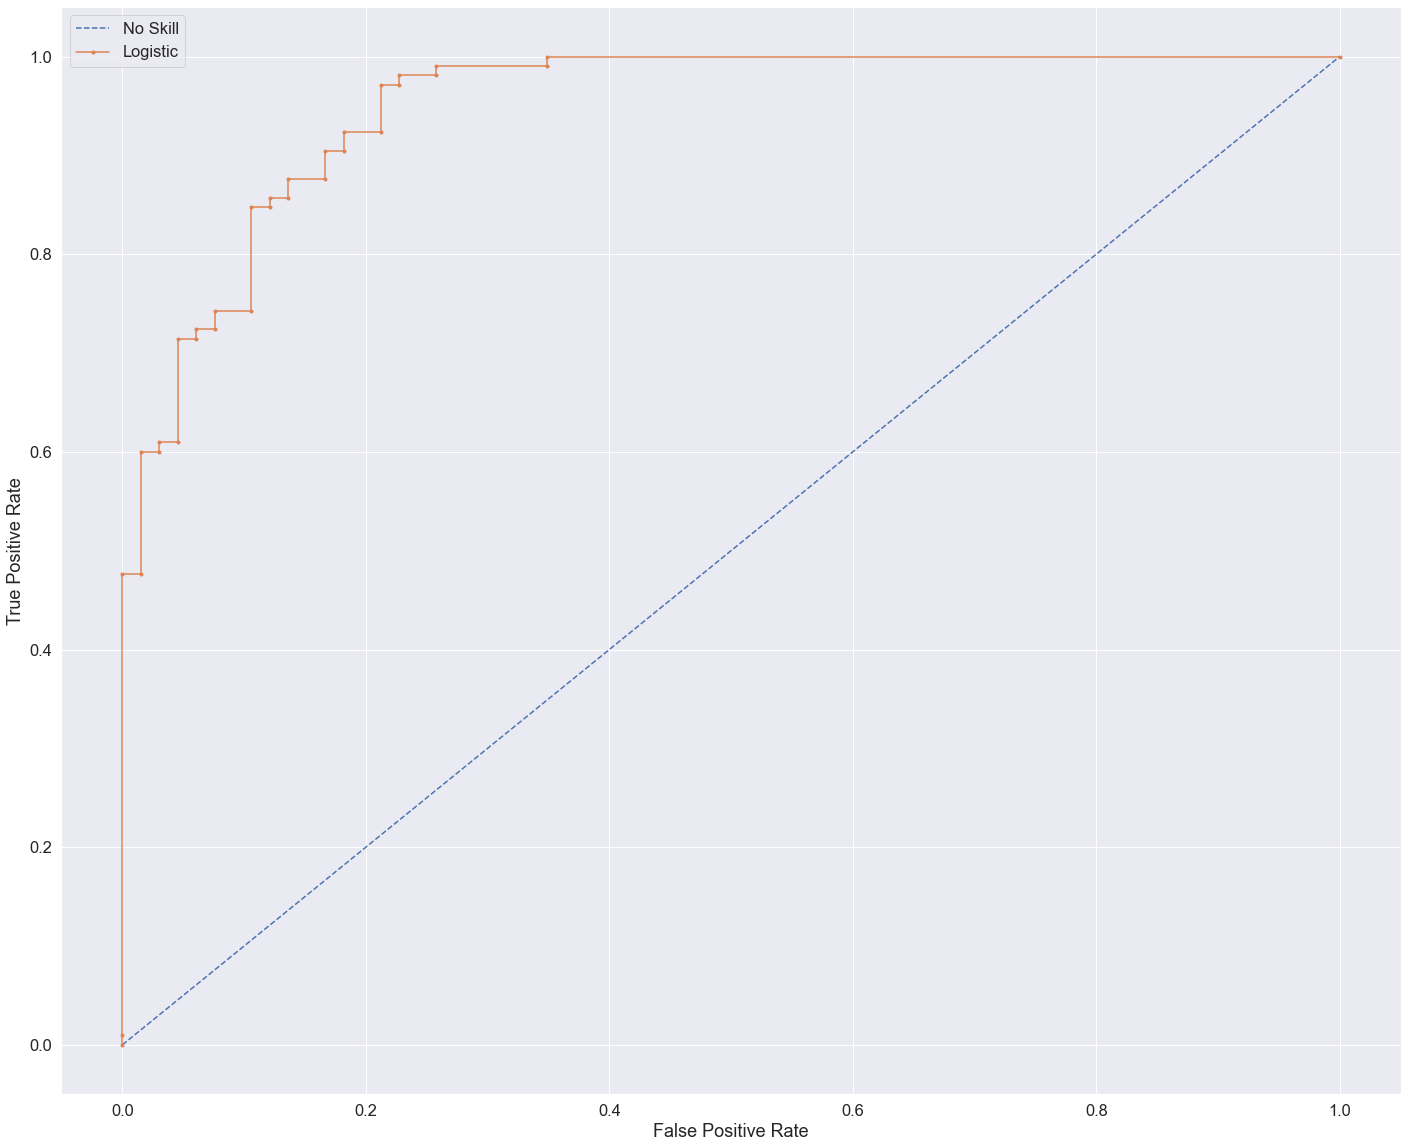

In [107]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Clustering dataset through Scikit Learn

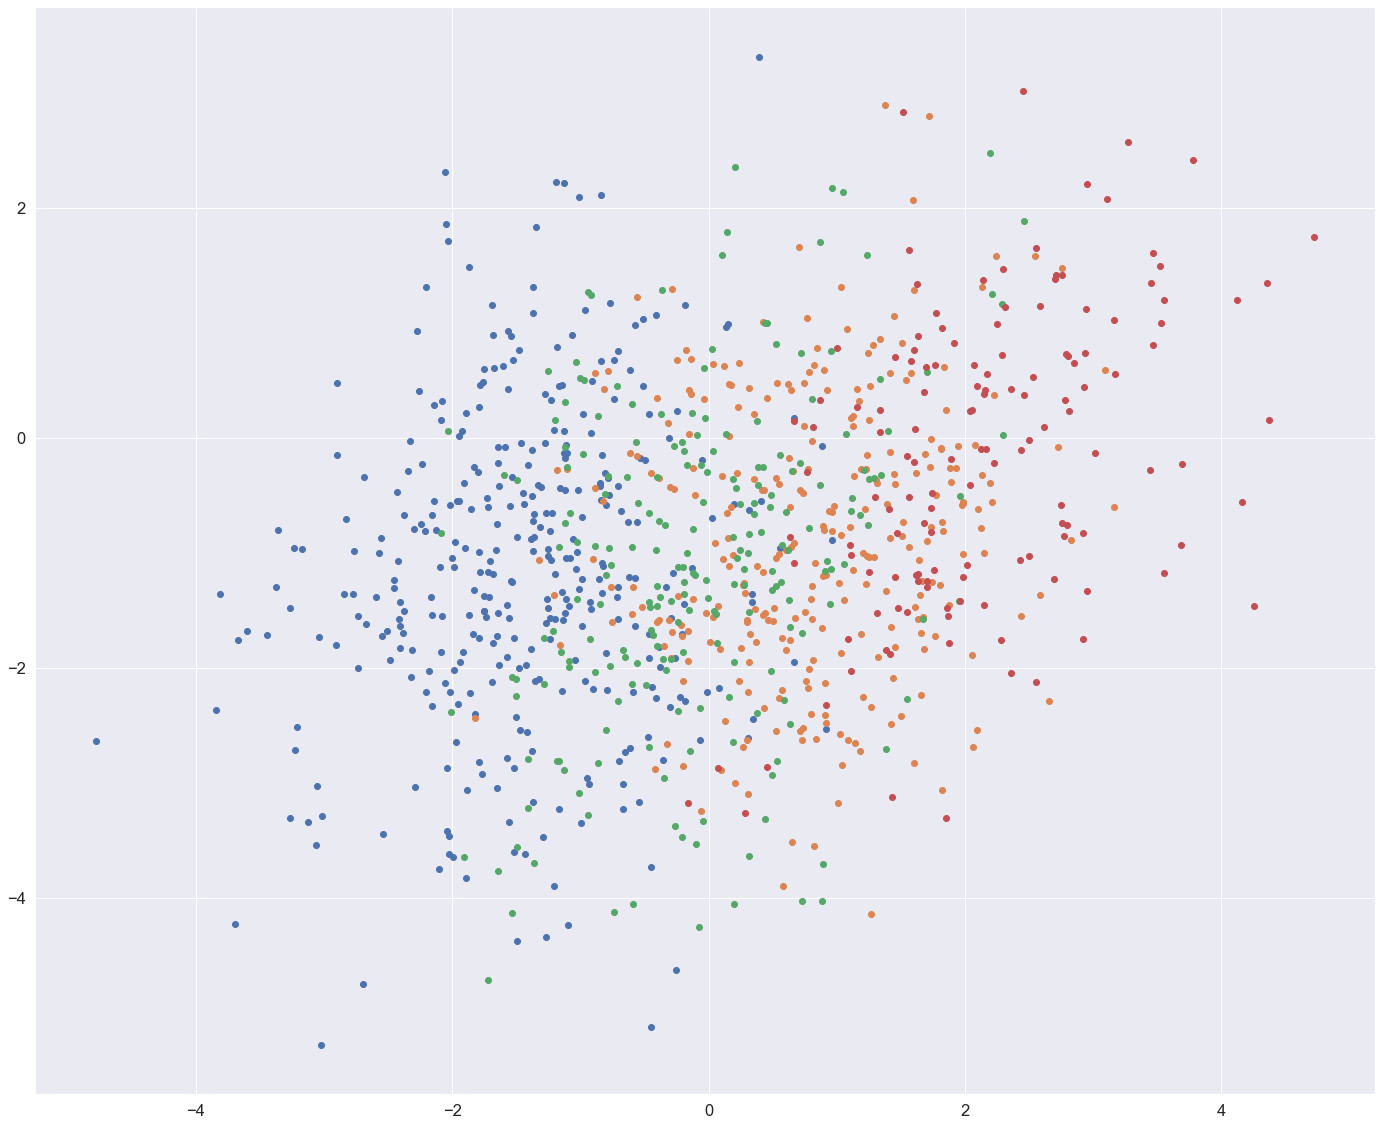

In [108]:
from numpy import where
from numpy import unique
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plot

train_data, _ = make_classification(n_samples=1000,
                                       n_features=6,
                                       n_informative=6,
                                       n_redundant=0,
                                       n_clusters_per_class=1,
                                       random_state=4)

agg_mdl = AgglomerativeClustering(n_clusters=4)
agg_result = agg_mdl.fit_predict(train_data)
agg_clusters = unique(agg_result)
for agg_cluster in agg_clusters:
    index = where(agg_result == agg_cluster)

    plot.scatter(train_data[index, 0], train_data[index,1])
plot.show()

## Machine Learning Models

### K Neighbors Classifier
The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

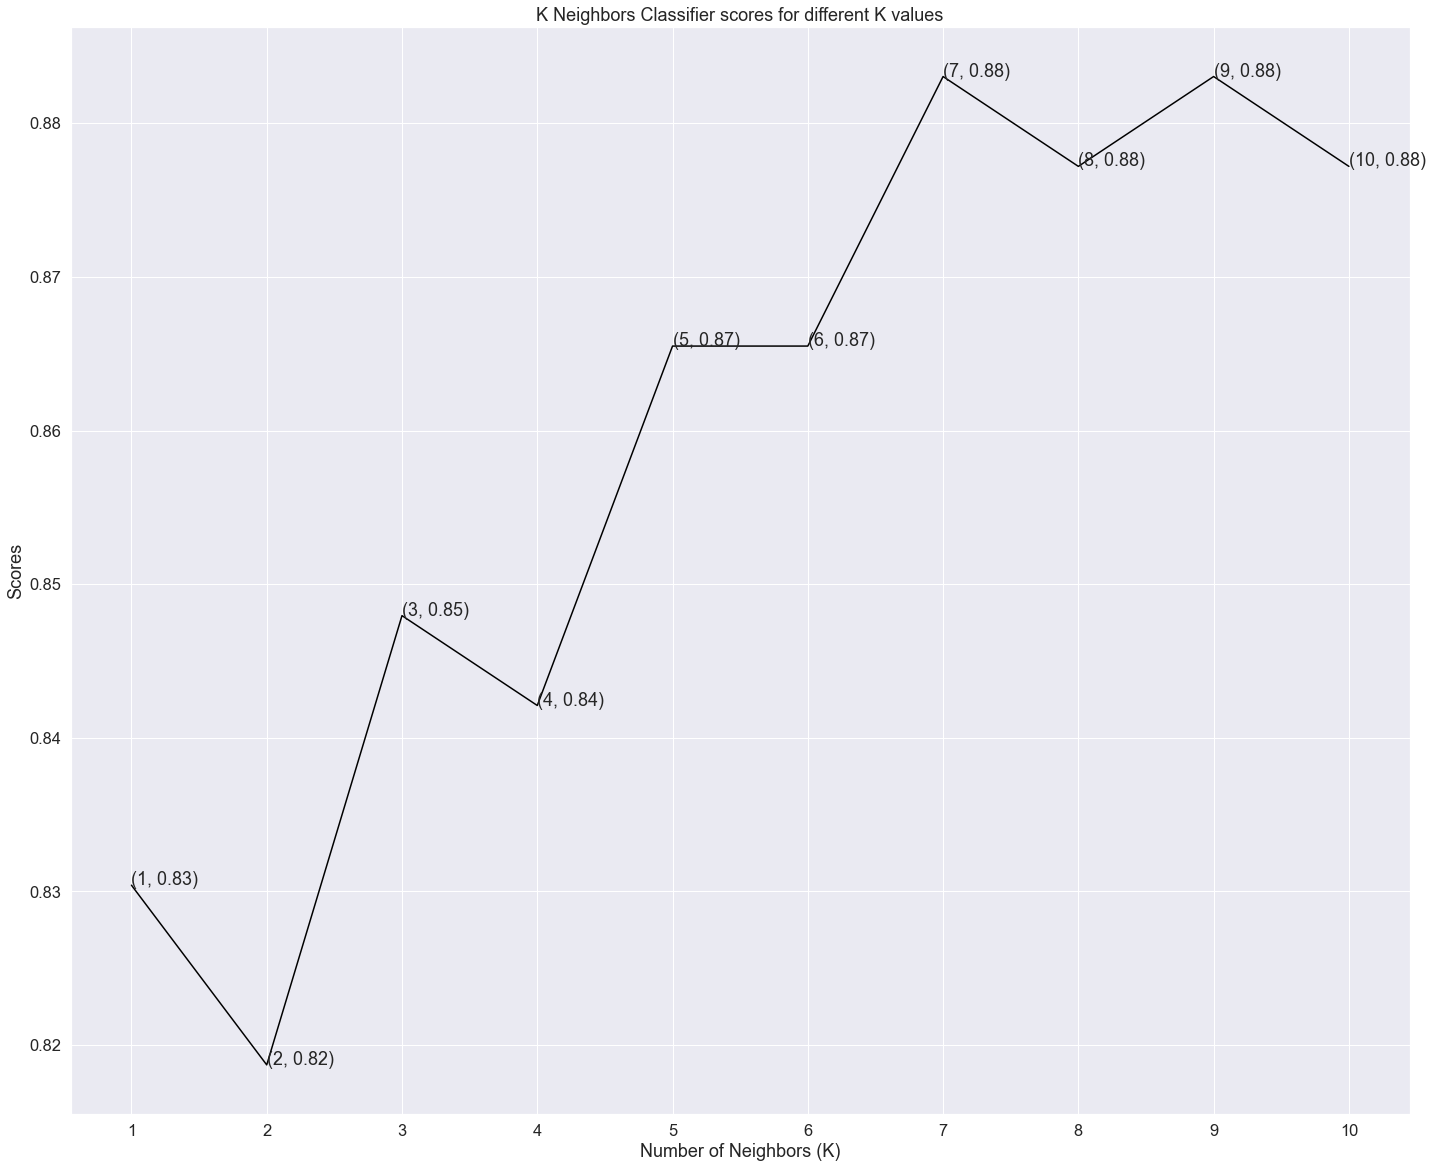

In [116]:
plt.plot([k for k in range(1, 11)], knn_scores, color = 'black')
for i in range(1,11):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1], 2)))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [117]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[6]*100, 6))

The score for K Neighbors Classifier is 88.30409356725146% with 6 nieghbors.


### Decision Tree Classifier

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [119]:
df.head()

,radius,texture,perimeter,area,smoothness,diagnosis
99,14.42,19.77,94.48,642.5,0.09752,0
399,11.80,17.26,75.26,431.9,0.09087,1
375,16.17,16.07,106.30,788.5,0.09880,1
256,19.55,28.77,133.60,1207.0,0.09260,0
252,19.73,19.82,130.70,1206.0,0.10620,0


In [124]:
standardScaler = StandardScaler()
columns_to_scale = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
y = dataset['diagnosis']
X = dataset.drop(['diagnosis'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [125]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

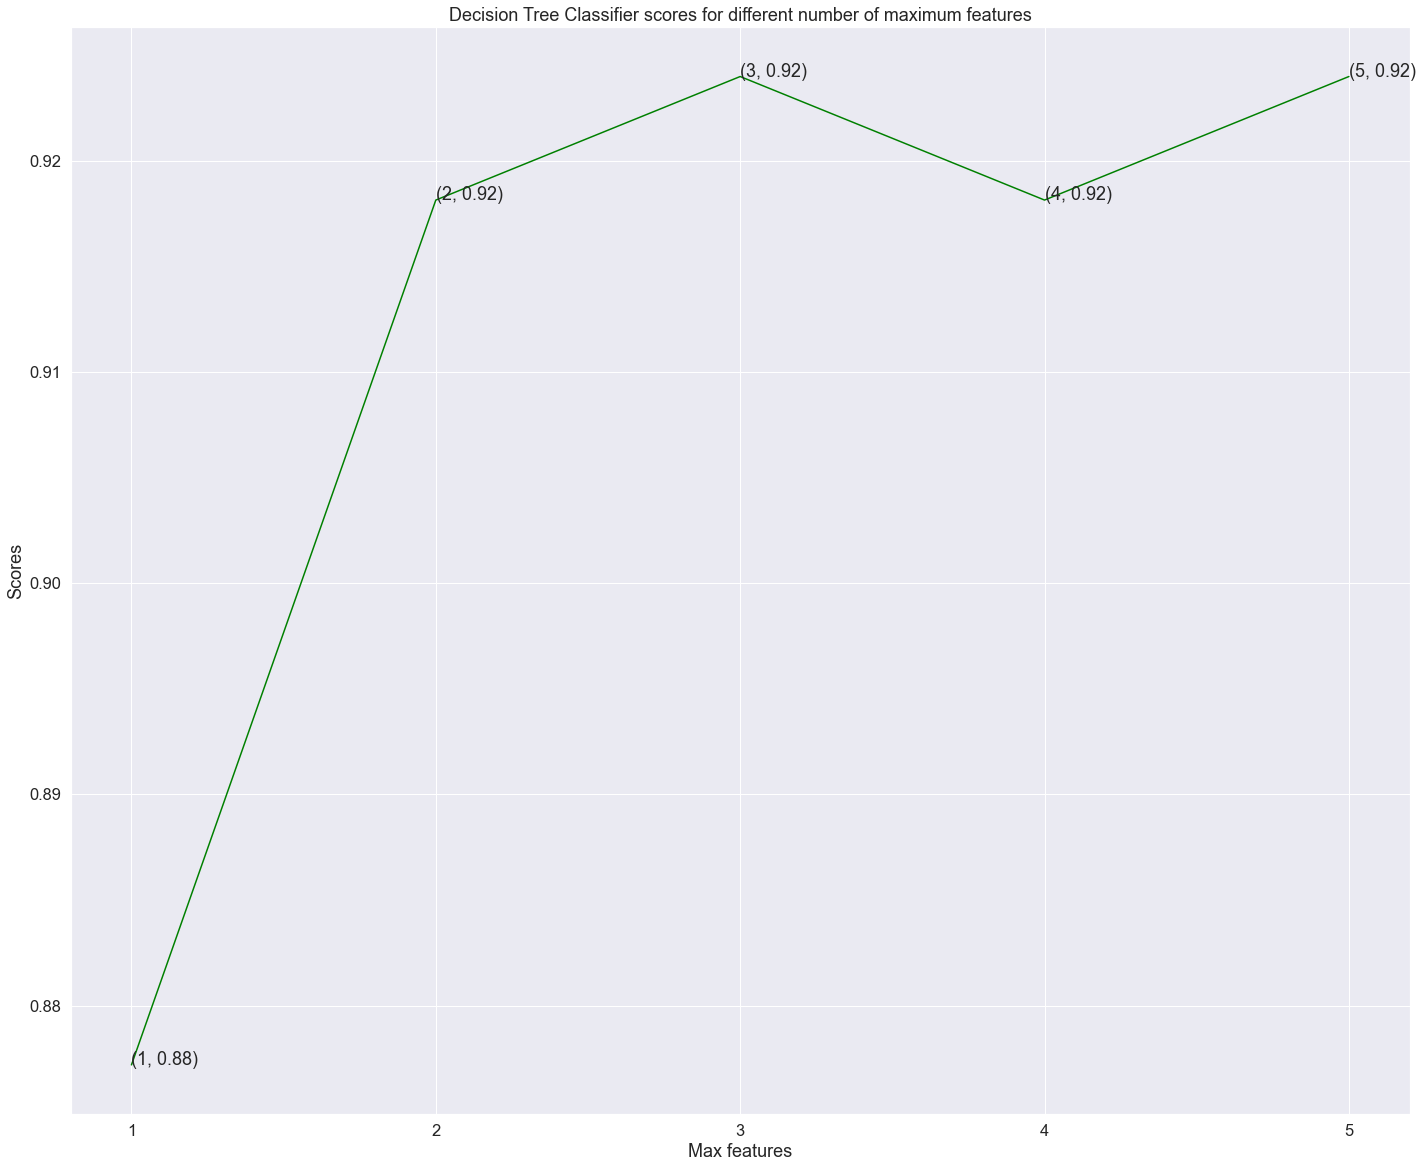

In [126]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, round(dt_scores[i-1], 2)))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [130]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[3]*100, [1,3,5]))

The score for Decision Tree Classifier is 91.81286549707602% with [1, 3, 5] maximum features.


### Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

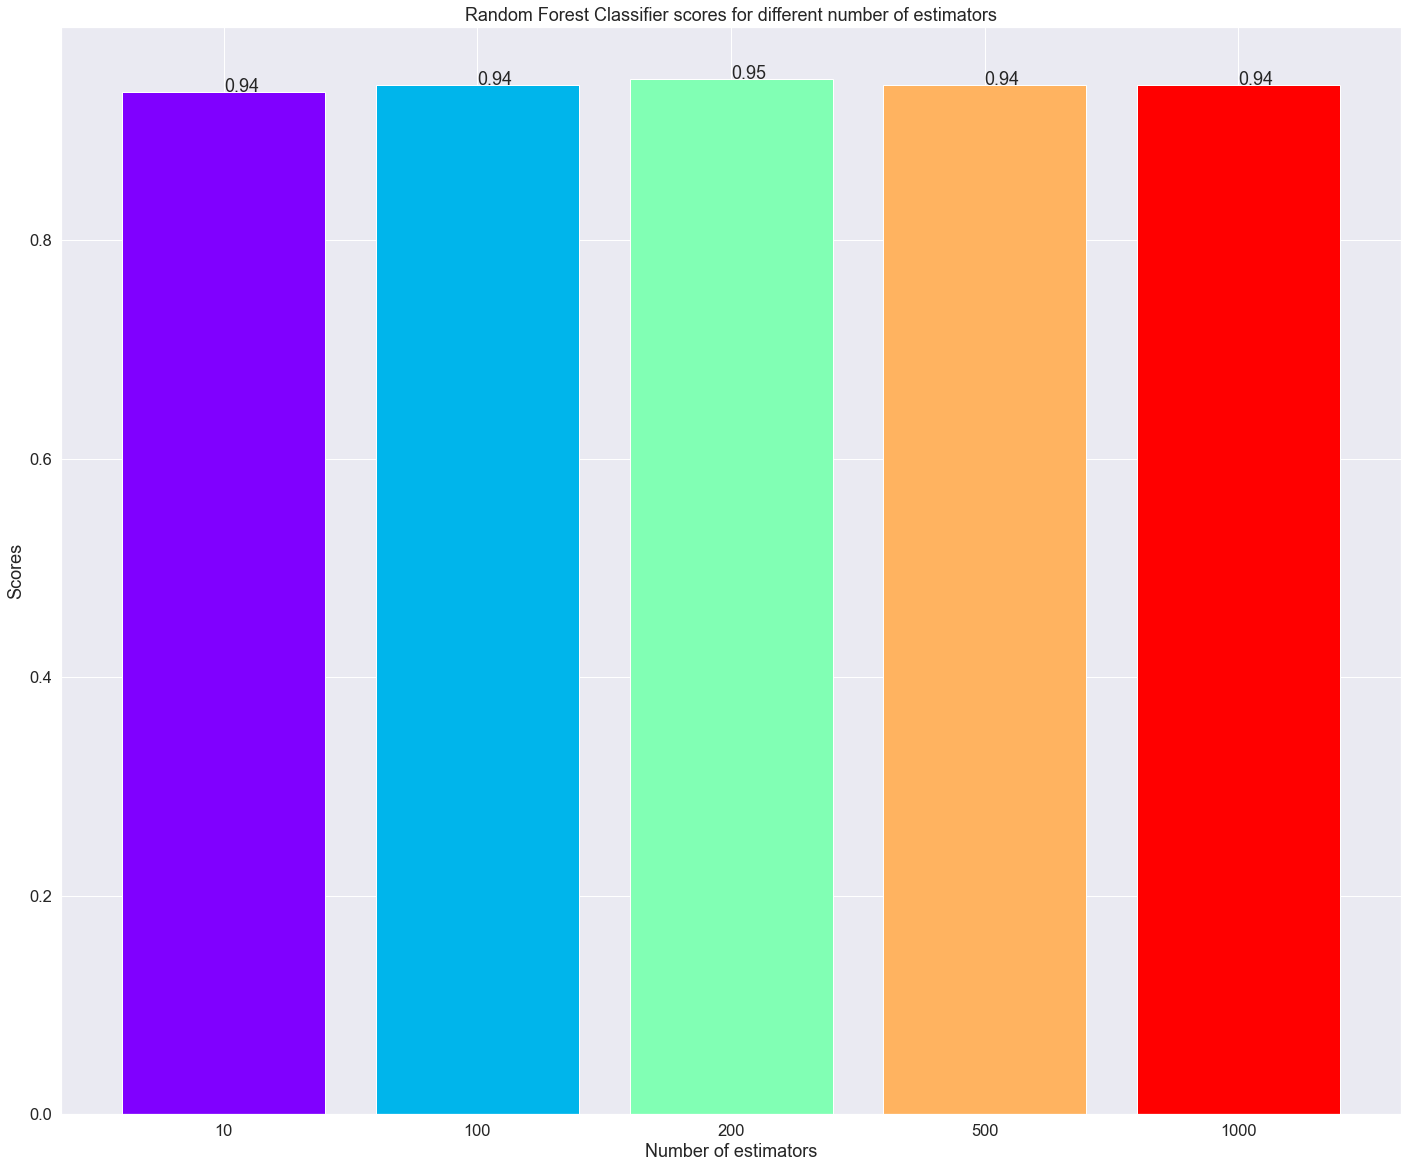

In [144]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],2))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [134]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 200]))

The score for Random Forest Classifier is 94.15204678362574% with [100, 200] estimators.


## SelectKbest()

In [135]:
from sklearn.feature_selection import RFE

### Selecting the Best important features according to Logistic Regression

In [136]:
rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 4, step = 1)
rfe_selector.fit(X, y)
X.columns[rfe_selector.get_support()]

Index(['mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'], dtype='object')

## SelectPercentile()

In [137]:
from sklearn.feature_selection import SelectPercentile, chi2
X_new = SelectPercentile(chi2, percentile=10).fit_transform(abs(X), y)
X_new.shape

(569, 1)

## SelectFromModel()

In [138]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [139]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape


(569, 3)

## Conclusion 
In this project, I am predicting if a person has breast cancer or not using machine learning. I applied 3 Machine Learning algorithms i.e. K Neighbors Classifier, Decision Tree Classifier and Random Forest Classifier. I varied parameters across each model to improve their scores. At the end, K Neighbors classifire has the score of 88.3% and Decision tree classifier has the score of 91.81%; however, Random Classifier achieved the highest score of 94.15%.